In [21]:
# Initial imports
import os 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

%matplotlib inline

In [22]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [23]:
# Set file path to csv and use file path to read CSV into a DataFrame and displaying a few rows
spy_csv = Path("CsvFiles/SPY.csv")
vgt_csv= Path("CsvFiles/VGT.csv")
# set file path to read CSV into a DataFrame
spy = pd.read_csv(spy_csv)
vgt = pd.read_csv(vgt_csv)

In [24]:
print(spy.head())
print(vgt.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  277.079987  278.899994  270.359985  272.170013  258.167450   
1  2018-10-12  276.769989  277.089996  272.369995  275.950012  261.752930   
2  2018-10-15  275.549988  277.040009  274.299988  274.399994  260.282654   
3  2018-10-16  276.600006  280.820007  276.070007  280.399994  265.973999   
4  2018-10-17  280.440002  281.149994  277.559998  280.450012  266.021454   

      Volume  
0  274840500  
1  183186500  
2  102263700  
3  118255800  
4  110626000  
         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  185.429993  188.490005  182.259995  183.600006  177.754654   
1  2018-10-12  188.580002  189.850006  185.720001  189.259995  183.234406   
2  2018-10-15  188.809998  189.139999  186.259995  186.550003  180.610718   
3  2018-10-16  188.880005  192.940002  188.500000  192.350006  186.226074   
4  2018-10-17  192.830002  192.830002  190.000000  191.669998 

In [25]:
# Make a data frame containing VGT and XLF close price
close_df = pd.DataFrame()
close_df["Date"] = spy["Date"]
close_df["XLF"] = spy["Close"]
close_df["VGT"] = vgt["Close"]
close_df.set_index(pd.DatetimeIndex(close_df["Date"].values))

,Date,XLF,VGT
2018-10-11,2018-10-11,272.170013,183.600006
2018-10-12,2018-10-12,275.950012,189.259995
2018-10-15,2018-10-15,274.399994,186.550003
2018-10-16,2018-10-16,280.399994,192.350006
2018-10-17,2018-10-17,280.450012,191.669998
...,...,...,...
2021-10-04,2021-10-04,428.640015,396.989990
2021-10-05,2021-10-05,433.100006,402.720001
2021-10-06,2021-10-06,434.899994,405.500000
2021-10-07,2021-10-07,438.660004,409.859985


/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


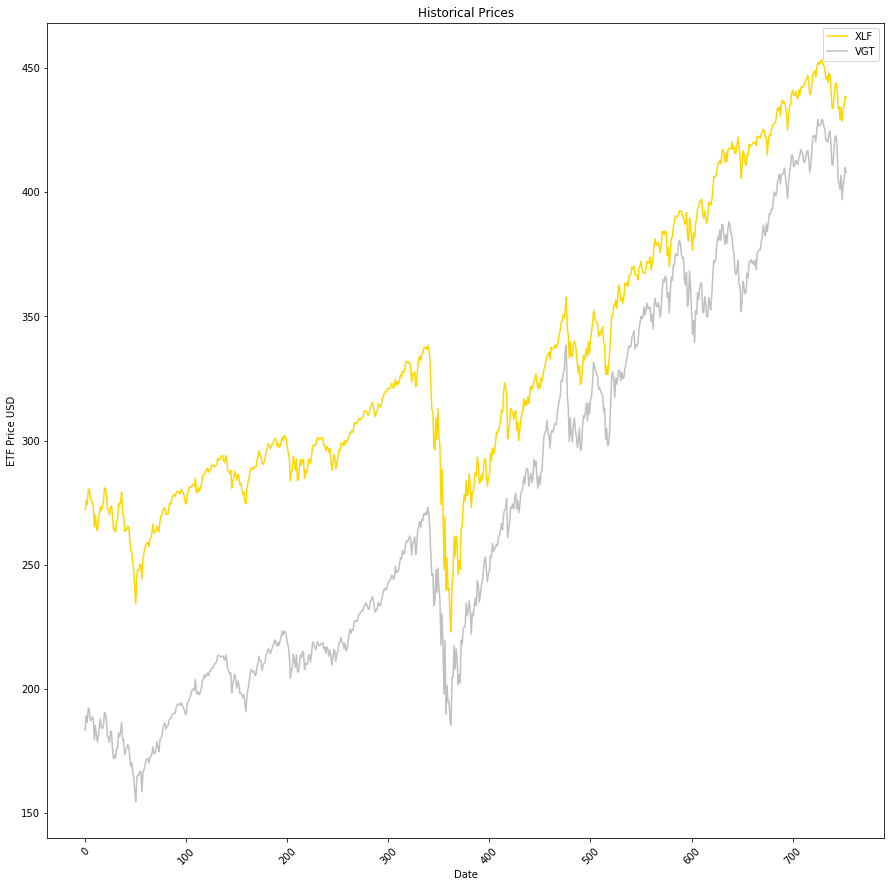

In [26]:
# Plot the data
plt.figure(figsize=(15,15))
plt.plot(close_df.index, close_df["XLF"], label="XLF", color="gold")
plt.plot(close_df.index, close_df["VGT"], label="VGT", color="silver")
plt.xlabel("Date")
plt.ylabel("ETF Price USD")
plt.legend()
plt.title("Historical Prices")
plt.xticks(rotation=45)
plt.show()

In [27]:
close_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [28]:
close_df.hvplot.line(xlabel="Year", ylabel="Daily Return")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [29]:
close_df = pd.DataFrame(
    {
        "ticker": ["XLF", "VGT"],
        "volatility": (18.5, 30.8)
    }
)

In [30]:
close_df.hvplot.bar(
    x='ticker', y='volatility', xlabel='Ticker', ylabel='Volatility'
)

:Bars   [ticker]   (volatility)